In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

## Lab | Customer Analysis Round 2

For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

### Dealing with the data

1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.

In [25]:
# loading file, showing head, tail and shape - no empty rows at the tail end as in round 1 - 10910 rows altogether

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop(['Unnamed: 0'],axis=1)
display(data.shape)
display(data.columns)
display(data.head())
display(data.tail())

(10910, 25)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,0,Suburban,Single,101,31.0,1,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


##  

### Below are my functions, which I'll keep here at the top as it is the combination of my efforts further below 

In [4]:
# I built my functions step-by-step and re-ran it multiple times to verify it was working after adding new lines

# Dataset cleaning function below

def CleanData(df):
    # below lines to change headers to lowercase
    cols = []
    for column in df.columns:
        cols.append(column.lower())
    cols
    df.columns = cols
    
    # below lines to take out spaces in titles
    df.columns = df.columns.str.replace(' ', '_')

    # below lines merges 3292 duplicate rows to 1516 with NaNs being replaced by valid data taken from the merged 
    # cells! See more details in my experiment section further below.
    df = df.replace('',np.nan, regex=True)
    df = df.groupby('customer',as_index=False,sort=False).last()
        
    # below replaces the only 337 remaining NaNs in column 'vehicle_type' with 'unknown'
    df = df.fillna('unknown')
    
    # converting the date in column 'effective_to_date' to datetime
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
    
    # below lines to display result
#     print("dataframe shape:", df.shape)
#     print("clean headers:", df.columns)
    
    # below lines to contrast numerical and categorical data with further insight
#     display(data.describe().T)
#     display(data.describe(include=[object]).T)
    
#     display(df.head())
#     display(df.tail())
    return df

In [26]:
data = CleanData(data)
data.shape

(9134, 25)

In [27]:
# checking for NaNs in the dataset

data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [ ]:
# not sure as to why, but my dupliacte merger code does not work when placed inside the above function?!?
# I placed it below for the last step in data cleaning and obtaining a NaN-free dataset
# I tried fiddling with the function implement, but couldn't get it to work...
    
# below lines merges 3292 duplicate rows to 1516 with NaNs being replaced by valid data taken from the merged 
# cells! See more details in my experiment section further below.
data = data.replace('',np.nan, regex=True)
data = data.groupby('customer',as_index=False,sort=False).last()
    
# below replaces the only 337 remaining NaNs in column 'vehicle_type' with 'unknown'
data = data.fillna('unknown')
    
display(data.describe().T)
display(data.describe(include=[object]).T)

# 

In [ ]:
# I established a separate function for the filtering by quarter excercise as it seemed weird to incorporate that
# into my cleaning function

# Additionally: seems weird to create a column to extract the month and use that to filter by quarter, when
# we can simply create a quarter column from our date instead and filter by that!

# def Q1Filter(df):
#     df['quarter'] = df['effective_to_date'].dt.quarter

In [ ]:
# In the end I decided to skip this as I ran out of time...

In [ ]:
# datacopy = data
# Q1Filter(datacopy)

##  

### What follows below is my experimentation

In [ ]:
# reload file to start anew
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop(['Unnamed: 0'],axis=1)

In [ ]:
# # My data cleaning requires that the headers have already been cleaned in accordance 
# # with what I set out to have them look as, so running the script below to clean the headers

# def ProperHeaders(df):
#     # below lines to change headers to lowercase
#     cols = []
#     for column in df.columns:
#         cols.append(column.lower())
#     cols
#     df.columns = cols
    
#     # below lines to take out spaces in titles
#     df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# instead of the below code I used on yesterday's excercise to only check for numerical data
# data._get_numeric_data()
# I instead use the two below to check for both numerical and categorical data with futher insights:

display(data.describe().T)
display(data.describe(include=[object]).T)

In [ ]:
# extracting month from effective_to_date

data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data

data['month'] = pd.DatetimeIndex(data['effective_to_date']).month
data.head()

In [ ]:
# df['Date'] = pd.to_datetime(df['Date']) -- if column is not datetime yet
data = data[data['effective_to_date'].dt.month <= 2]
data

In [ ]:
# checking for NaNs in the dataset

data.isna().sum()

In [ ]:
# creating a separate dataframe that only keeps the duplicate rows from data 
# - this gives a result of 3292 duplicate rows, quite a lot in my opinion

duplicates = data[data.duplicated('customer',keep=False)==True]
duplicates

**I used the below to examine some of the duplicate rows with the unique identifier 'customer' In doing so, I realized that these rows contain NaNs, which are often given a value in their duplicate rows. So to keep the integrity of the dataset, I thought it be best to merge duplicates and have python keep the relevant infomation in place of NaNs wherever possible**

In [ ]:
duplicates[duplicates['customer']=='ID89933']

**After quite some research and trial and error on how to merge duplicate cells while preserving all valid data in place of NaNs, I came across the formula below, which instantly worked and seemingly merged all duplicates reliably!!!**

In [ ]:
# the below cuts down 3292 duplicate rows to 1516 with intact data!

duplicates = duplicates.replace('',np.nan, regex=True)
duplicates1 = duplicates.groupby('customer',as_index=False,sort=False).last()
duplicates1

In [ ]:
# checking the result on a sample customer id

duplicates1[duplicates1['customer']=='ID89933']

In [ ]:
# checking for NaNs in the cleaned dataset - just 337 NaNs remaining in vehicle_type! With these last cells I 
# decided to fill them with an 'unknown' value

duplicates1.isna().sum()

In [ ]:
# to fill remaining NaNs with unknown

duplicates1 = duplicates1.fillna('unknown')

duplicates1.isna().sum()

## Based on this, I proceeded to incorporate the merger code into my function at the top

### Some notes:
**While the duplicate merger seems to have worked to my expectation, I have no way of verifying whether in fact all these duplicates really merged super reliably.**

# 
# 

# Lab | Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

### Get the data

- Use the same jupyter file from the last lab, Customer Analysis Round 3

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [28]:
data


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown


In [29]:
# not sure if you mean the function below by show dataframe info?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [30]:
display(data.describe().T)
display(data.describe(include=[object]).T)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,count,unique,top,freq
customer,9134,9134,DK49336,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788


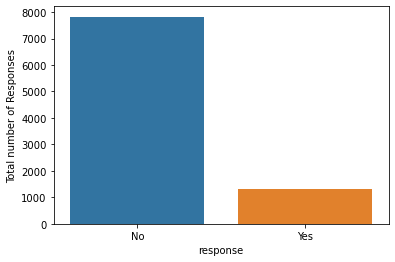

In [31]:
# plotting total number of responses

# display(data['response'].value_counts())

# # sns.barplot("response", data=data)
# # plt.show()

# sns.displot(data['response'], bins=2)
# display(plt.show())


sns.countplot(x ='response', data=data)
plt.ylabel('Total number of Responses')
plt.show()

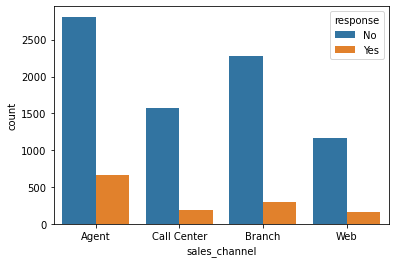

In [32]:
# sns.scatterplot(x='sales_channel', y='response', data=data)
# plt.show()

sns.countplot(x ='sales_channel', hue = "response", data = data)
plt.show()

In [34]:
# to create response rate column

round3data['response_rate'] = np.where(data.response=='Yes',1,0)
round3data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,0
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,0
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,0
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,0


<AxesSubplot:xlabel='sales_channel', ylabel='response_rate'>

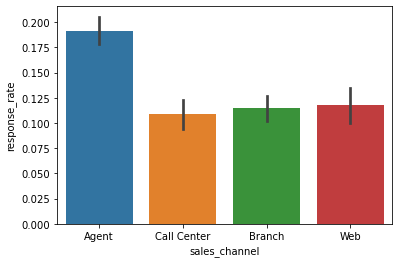

In [35]:
sns.barplot(x= 'sales_channel',y='response_rate',data=round3data)

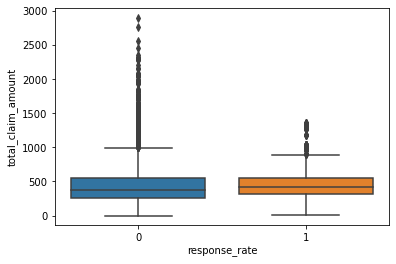

In [36]:
sns.boxplot(x = 'response_rate',y='total_claim_amount', data=data)
plt.show()

- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [40]:
# trying what Erin had shown us with binning the data

# sns.displot(x=data['total_claim_amount'], bins=5)
# plt.show()

print('Maximum value',round3data['total_claim_amount'].max())
print('Minimum value',round3data['total_claim_amount'].min())
print('Mean value',round3data['total_claim_amount'].mean())

Maximum value 2893.239678
Minimum value 0.099007
Mean value 434.08879431289535


In [41]:
def tca_bins(x):
    if x <=450:
        return 1
    elif x<=900:
        return 2
    elif x<=1350:
        return 3
    elif x<=1800:
        return 4
    else:
        return 5
    
round3data['total_claim_amount_bins'] = list(map(tca_bins, round3data['total_claim_amount']))

round3data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_rate,total_claim_amount_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,0,1
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,0,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,0,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,2
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,0,1
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,0,2
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,0,1
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,0,1


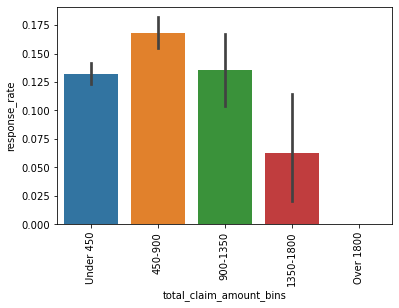

In [44]:
fig, ax = plt.subplots()
sns.barplot(x= 'total_claim_amount_bins',y='response_rate',data=round3data)

labels=['Under 450','450-900','900-1350','1350-1800','Over 1800']

# read the documentation for correct syntax
ax.set_xticklabels(x='total_claim_amount_bins',labels=labels,rotation='vertical')
plt.show()

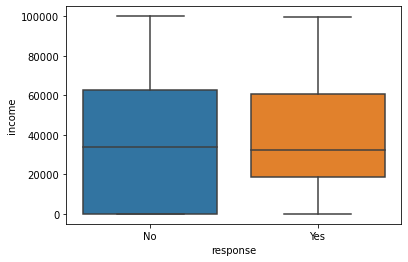

In [45]:
sns.boxplot(x = 'response',y='income', data=data)
plt.show()

In [46]:
print('Maximum value',round3data['income'].max())
print('Minimum value',round3data['income'].min())
print('Mean value',round3data['income'].mean())

Maximum value 99981
Minimum value 0
Mean value 37657.38000875848


In [55]:
round3data = round3data.drop(['income_bins'],axis=1)

In [56]:
def tca_bins(x):
    if x <20000:
        return 1
    elif x<40000:
        return 2
    elif x<60000:
        return 3
    elif x<80000:
        return 4
    else:
        return 5
    
round3data['income_bins'] = list(map(tca_bins, round3data['income']))

round3data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_rate,total_claim_amount_bins,income_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,0,1,3
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,0,2,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,0,2,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,2,3
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,0,1,3
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,0,2,1
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,0,1,4
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,0,1,2


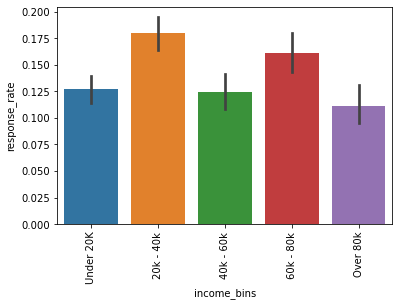

In [57]:
fig, ax = plt.subplots()
sns.barplot(x='income_bins',y='response_rate',data=round3data)

labels=['Under 20K','20k - 40k','40k - 60k','60k - 80k','Over 80k']

# read the documentation for correct syntax
ax.set_xticklabels(x='income_bins',labels=labels,rotation='vertical')
plt.show()

# 

# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

### Get the data

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
# somehow the bin columns got to the original data, dropping them out
data = data.drop(['total_claim_amount_bins','response_rate','income_bins'],axis=1)

In [62]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown


In [63]:
#checking datatypes
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [64]:
#dividing dataframe into numericals and categoricals
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = object)
display(numerical.head())
display(categorical.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,4.0,31,0.0,7,707.925645


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


In [65]:
#attempting to check the normality of the numerical variables visually, first by describing the data
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


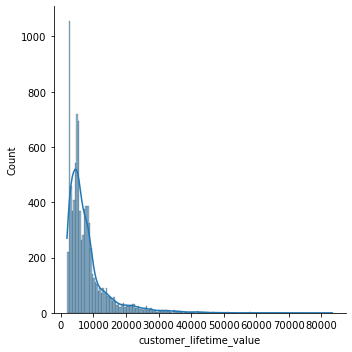

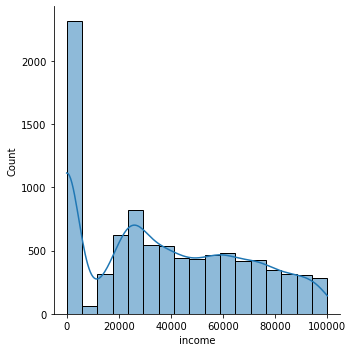

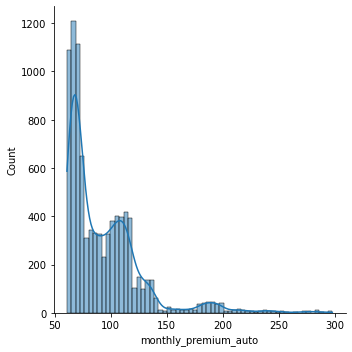

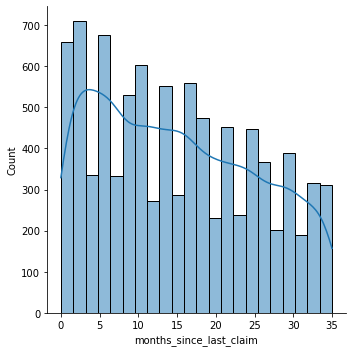

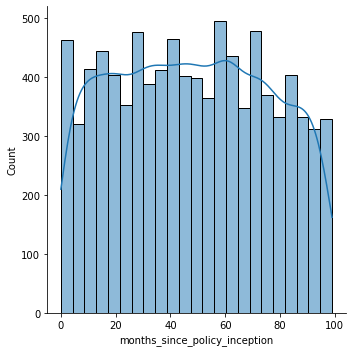

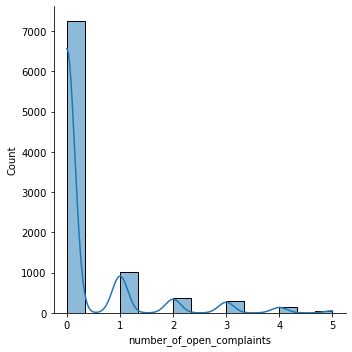

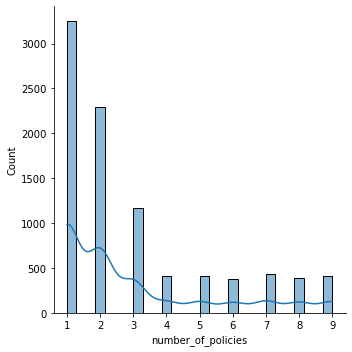

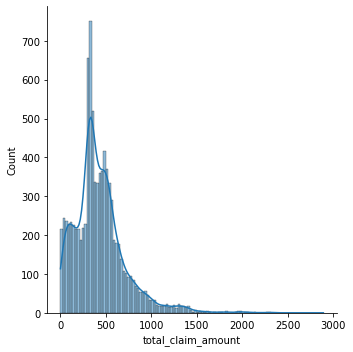

In [69]:
for column in numerical:
    sns.displot(numerical[column],kde=True)
    plt.show()

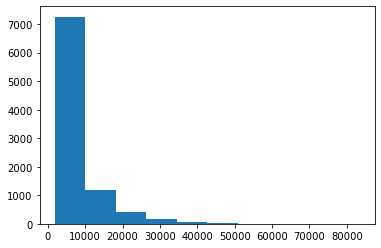

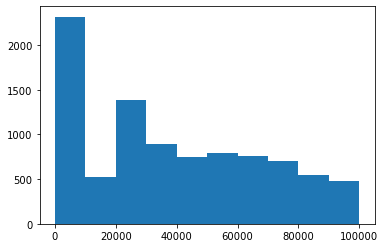

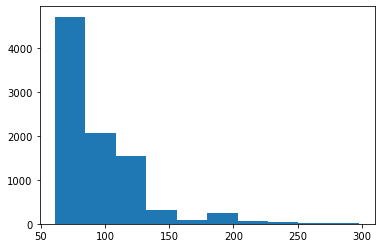

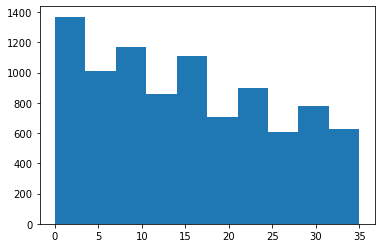

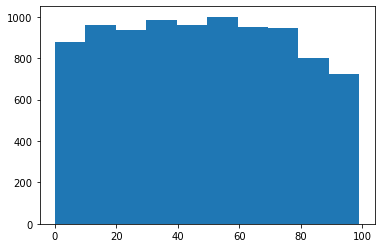

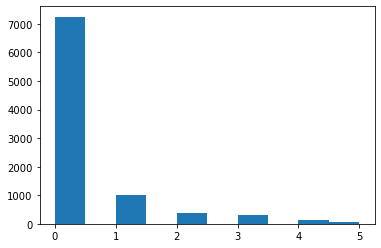

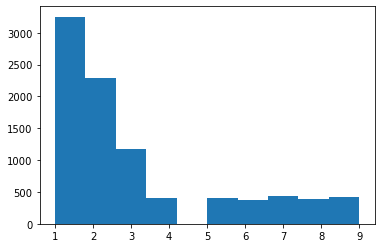

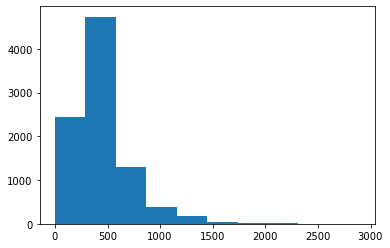

In [70]:
fig, ax = plt.subplots()
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.show()

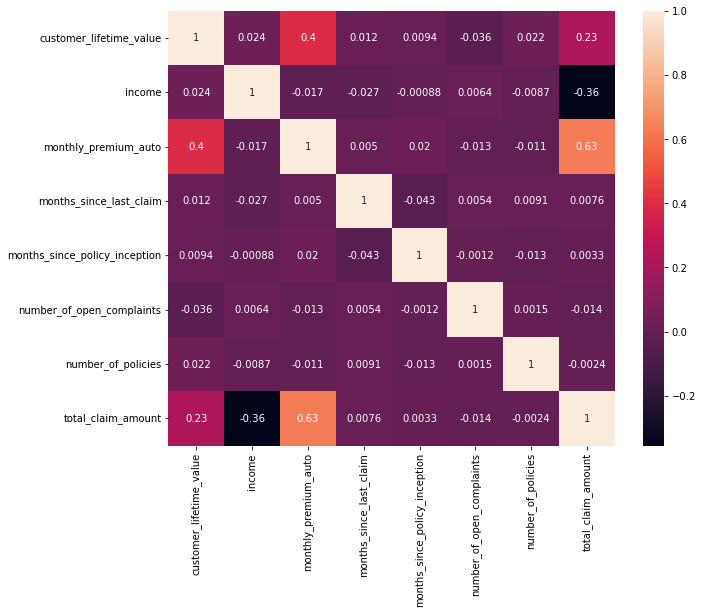

In [77]:
#checking correlations between variables
correlations_matrix = numerical.corr()
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [78]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


**Looks like income is rather poor to correlate to... Best bet seems monthly premium matched to both customer lifetime value and total claim amount. A bit stumped by this, but attempting to plot some charts below**

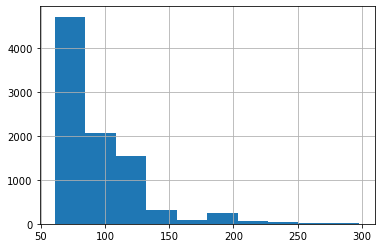

In [79]:
#inse
numerical['monthly_premium_auto'].hist()
plt.show()

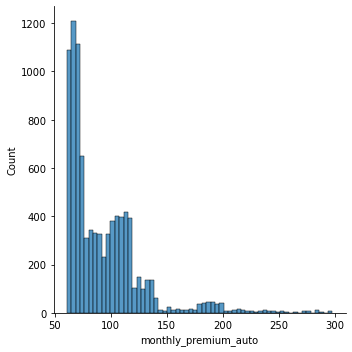

In [80]:
sns.displot(numerical['monthly_premium_auto'])
plt.show()

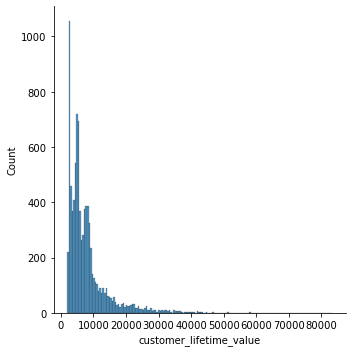

In [81]:
sns.displot(numerical['customer_lifetime_value'])
plt.show()

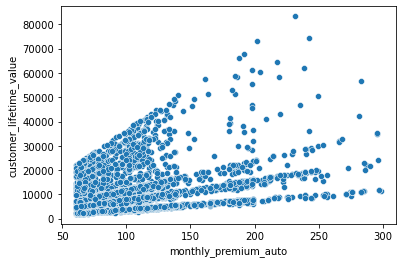

In [82]:
sns.scatterplot(x='monthly_premium_auto',y='customer_lifetime_value',data=numerical)
plt.show()

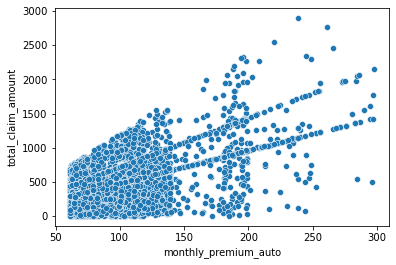

In [83]:
sns.scatterplot(x='monthly_premium_auto',y='total_claim_amount',data=numerical)
plt.show()

**The above show a cler relationship and trend, but the correlation is still very poor, so I decided not to drop any values as was requested**

### Update: after trying the bins, I dropped them regardless at the beginning of the excercise and thus they had no influence on my correlation matrices

# 

# Lab | Customer Analysis Round 5

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

### Get the data

We are using the marketing_customer_analysis.csv file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(Further processing...)

- X-y split.
- Normalize (numerical).

In [85]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown


In [87]:
X = data.drop('total_claim_amount', axis=1)
y = data['total_claim_amount']
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,4.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


In [88]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [89]:
X_num.shape

(9134, 7)

In [90]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.00000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.00000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.00000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.00000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.00000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.00000


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### MinMax Normalization

In [92]:
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num) # does the actual scaling
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087527,0.236795,0.236287,0.114286,0.313131,0.0,0.750


<class 'pandas.core.frame.DataFrame'>


In [93]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly_premium_auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0


### Standard Scaler Normalization

In [94]:
Standardtransformer = StandardScaler().fit(X_num)
X_standardized = Standardtransformer.transform(X_num)
print(X_standardized.shape)
X_standardized = pd.DataFrame(X_standardized,columns=X_num.columns)
X_standardized.head()

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.42225,2.524561
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.42225,-0.822648
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.42225,-0.404247
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.42225,-0.404247
4,0.148477,-0.460276,0.691177,-1.101690,-0.611536,-0.42225,1.687759


In [95]:
X_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,1.938697e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
income,9134.0,2.661910e-16,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
monthly_premium_auto,9134.0,5.486694e-17,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
months_since_last_claim,9134.0,5.248460e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
months_since_policy_inception,9134.0,9.925642e-17,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
number_of_open_complaints,9134.0,-4.276559e-16,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
number_of_policies,9134.0,-1.483863e-16,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561


# 

# Lab | Customer Analysis Round 6

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

### Processing Data

- One Hot/Label Encoding (categorical).
- Concat DataFrames

### Linear Regression

- Train-test split.
- Apply linear regression.

### Model Validation

Description:
- R2.
- MSE.
- RMSE.
- MAE.

In [97]:
X_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


### Checking which columns may influence our y variable total claim amount

In [114]:
print("array: ", X_cat['coverage'].unique())
print(X_cat['coverage'].value_counts())

array:  ['Basic' 'Extended' 'Premium']
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64


In [108]:
print("array: ", X_cat['vehicle_type'].unique())
print(X_cat['vehicle_type'].value_counts())

array:  ['A' 'unknown']
A          4961
unknown    4173
Name: vehicle_type, dtype: int64


In [109]:
print("array: ", X_cat['policy_type'].unique())
print(X_cat['policy_type'].value_counts())

array:  ['Corporate Auto' 'Personal Auto' 'Special Auto']
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64


In [110]:
print("array: ", X_cat['policy'].unique())
print(X_cat['policy'].value_counts())

array:  ['Corporate L3' 'Personal L3' 'Personal L2' 'Corporate L2' 'Personal L1'
 'Special L1' 'Corporate L1' 'Special L3' 'Special L2']
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64


In [111]:
print("array: ", X_cat['renew_offer_type'].unique())
print(X_cat['renew_offer_type'].value_counts())

array:  ['Offer3' 'Offer4' 'Offer2' 'Offer1']
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64


In [112]:
print("array: ", X_cat['vehicle_class'].unique())
print(X_cat['vehicle_class'].value_counts())

array:  ['Four-Door Car' 'SUV' 'Two-Door Car' 'Sports Car' 'Luxury Car'
 'Luxury SUV']
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64


In [113]:
print("array: ", X_cat['vehicle_size'].unique())
print(X_cat['vehicle_size'].value_counts())

array:  ['Medsize' 'Small' 'Large']
Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64


### I'll attempt encoding below. As my y value is total claim amount, I will encode only categories which may have have an impact. I assume these categories to be: coverage, policy_type, policy, vehicle_class, vehicle_size

In [119]:
# dropping unnecessary columns:

X_cat1 = X_cat[['coverage', 'policy_type', 'policy', 'vehicle_class', 'vehicle_size']]
X_cat1.head()

,coverage,policy_type,policy,vehicle_class,vehicle_size
0,Basic,Corporate Auto,Corporate L3,Four-Door Car,Medsize
1,Basic,Personal Auto,Personal L3,Four-Door Car,Medsize
2,Basic,Personal Auto,Personal L3,SUV,Medsize
3,Extended,Corporate Auto,Corporate L3,Four-Door Car,Medsize
4,Premium,Personal Auto,Personal L2,Four-Door Car,Medsize


In [120]:
# importing OneHot

from sklearn.preprocessing import OneHotEncoder

running OneHot below

In [127]:
encoder = OneHotEncoder(drop='first').fit(X_cat1)
encoded = encoder.transform(X_cat1).toarray()
encoded
cols = encoder.get_feature_names_out(input_features=X_cat1.columns)
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()

,coverage_Extended,coverage_Premium,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [134]:
X = pd.concat([X_normalized, onehot_encoded], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage_Extended,coverage_Premium,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.087527,0.236795,0.236287,0.114286,0.313131,0.0,0.750,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
y

0       292.800000
1       744.924331
2       480.000000
3       484.013411
4       707.925645
           ...    
9129    355.200000
9130    897.600000
9131    273.018929
9132    381.306996
9133    618.288849
Name: total_claim_amount, Length: 9134, dtype: float64

### train-test split below

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 26)
(1827, 26)
(7307,)
(1827,)


In [137]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage_Extended,coverage_Premium,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
5123,0.106495,0.457847,0.118143,0.057143,0.171717,0.0,0.125,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7738,0.082567,0.000000,0.109705,0.342857,0.121212,0.2,0.125,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,0.074882,0.666977,0.025316,1.000000,0.505051,0.4,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8580,0.005396,0.000000,0.016878,0.885714,0.525253,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7857,0.027911,0.294676,0.194093,0.800000,0.232323,0.2,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [138]:
y_train.head()

5123     95.950810
7738    417.600000
214      38.763897
8580    468.000000
7857    513.600000
Name: total_claim_amount, dtype: float64

### Let's apply linear regression to this!!

In [153]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [143]:
lm = linear_model.LinearRegression()

In [144]:
%%time

lm.fit(X_train,y_train)

print('b0 = ', lm.intercept_)
print('b1 = ', lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

b0 =  377.04538160564647
b1 =  [-4.69100086e+01 -3.29755625e+02  1.29820130e+03 -4.33663730e+00
 -1.42260435e+01 -1.29301359e+00  5.04176623e+00 -1.54357328e+01
 -2.68098475e-01  1.60512221e+01  2.65084840e+01  1.34474078e+01
  1.61220548e+01  1.07535987e+01  3.87515410e+00  1.42246926e+00
  3.08625664e+01 -1.93598413e+01  1.50057589e+01  1.25346849e+01
  1.88553502e+01 -1.51651818e+01 -3.22622899e+01  2.60202822e+00
 -7.08386541e+00  6.30462865e+01]
CPU times: user 21.5 ms, sys: 5.21 ms, total: 26.7 ms
Wall time: 8.98 ms


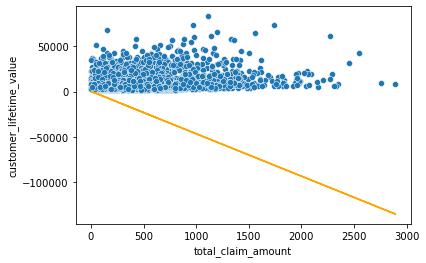

In [146]:
regression_line = lm.intercept_ + lm.coef_[0]*data['total_claim_amount']
plt.plot(data['total_claim_amount'], regression_line, c = 'orange')
sns.scatterplot(x='total_claim_amount',y='customer_lifetime_value',data=data)
plt.show()

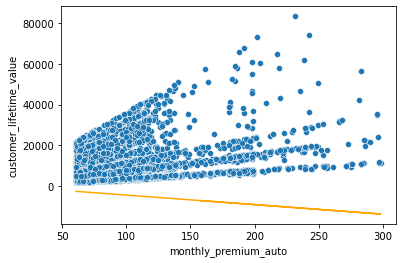

In [162]:
regression_line = lm.intercept_ + lm.coef_[0]*data['monthly_premium_auto']
plt.plot(data['monthly_premium_auto'], regression_line, c = 'orange')
sns.scatterplot(x='monthly_premium_auto',y='customer_lifetime_value',data=data)
plt.show()

### Well, that didn't seem to work... I believe I chose the wrong values to contrast? But I also believe I shouln't be seeing negative values. Will continue with the rest below and see if I can clear it up

### Model Validation:
- R2.
- MSE.
- RMSE.
- MAE.

In [149]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5326253154637317

In [150]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5182769695565146

just above .5 seems low(ish), so the model appears to not be extremely accurate... But at the least we seem to have that natural decrease between train and test

In [151]:
mse=mean_squared_error(y_test,predictions_test)
mse

40043.09244659008

the train/test MSE evaluation seems extremely high

In [152]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

200.10770211711014

again, the rmse and also mae seems to be extremely high... I must have gone wrong somewhere, but backtracking, I cannot find out where...

In [154]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

142.7491256362518


#  

# Lab | Customer Analysis Round 7

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

use the concept of multicollinearity and remove insignificant variables
use a different method of scaling the numerical variables
use a different ratio of train test split
use the transformation on numerical columns which align it more towards a normal distribution
### Get the data

We are using the marketing_customer_analysis.csv file.

### Dealing with the data

Already done in rounds 2 to 7.

Bonus: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

### My attempt at a Function below, but parts of it don't seem to execute as expected, even though there are no error messages displayed, the results are off

In [159]:
ProperTestDF = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
ProperTestDF = ProperTestDF.drop(['Unnamed: 0'],axis=1)

In [155]:
def MisterProper(df):
    # below lines to change headers to lowercase
    cols = []
    for column in df.columns:
        cols.append(column.lower())
    cols
    df.columns = cols
    
    # below lines to take out spaces in titles
    df.columns = df.columns.str.replace(' ', '_')

    # below lines merges 3292 duplicate rows to 1516 with NaNs being replaced by valid data taken from the merged 
    # cells! See more details in my experiment section further below.
    df = df.replace('',np.nan, regex=True)
    df = df.groupby('customer',as_index=False,sort=False).last()
        
    # below replaces the only 337 remaining NaNs in column 'vehicle_type' with 'unknown'
    df = df.fillna('unknown')
    
    # converting the date in column 'effective_to_date' to datetime
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
    
    #dividing dataframe into numericals and categoricals
    numerical1 = df.select_dtypes(include = np.number)
    categorical1 = df.select_dtypes(include = object)

    # X/y split
    X1 = df.drop('total_claim_amount', axis=1)
    y1 = df['total_claim_amount']
    X1_num = X1.select_dtypes(include = np.number)
    X1_cat = X1.select_dtypes(include = object)
    
    # MinMax
    MinMaxtransformer = MinMaxScaler().fit(X1_num)
    X1_normalized = MinMaxtransformer.transform(X1_num) 
    X1_normalized = pd.DataFrame(X1_normalized,columns=X1_num.columns)
    display(X1_normalized.head())
    
    # ColumnDrop
    X1_cat1 = X1_cat[['coverage', 'policy_type', 'policy', 'vehicle_class', 'vehicle_size']]
    
    # OneHot
    encoder1 = OneHotEncoder(drop='first').fit(X1_cat1)
    encoded1 = encoder1.transform(X1_cat1).toarray()
    encoded1
    cols1 = encoder1.get_feature_names_out(input_features=X1_cat1.columns)
    cols1
    onehot_encoded1 = pd.DataFrame(encoded1, columns=cols1)
    
    # concat
    X1 = pd.concat([X1_normalized, onehot_encoded1], axis=1)
    
    return df

In [158]:
MisterProper(ProperTestDF)
ProperTestDF.shape

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087527,0.236795,0.236287,0.114286,0.313131,0.0,0.750


(10910, 25)

# feeling like I failed... hope to better understand this after Monday and improve on the regression modelling then... Sorry :'(

# 

# Lab | Customer Analysis Final Round

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the .csv file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.

# I'm so sorry... I feel good from 1 thru 3 and 4, but have gaps in understanding for parts of 4, 5 and 6. I will redeliver when I feel better equipped...

D: